In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import mitequinox.parcels as pa



In [4]:
# Load Lagrangian data
root_dir = '/Users/zcaspar/codes/mit4320/'
#run_name = 'global_T365j_dt1j_dij50'

#run_name_old = 'global_extra_T365j_dt1j_dij50'
#parcels_index = 'lpass_filtered_iprime_05cpd' #_iprime
parcels_index = 'llc_parcels_filtered_itide_Tw30_sd_band04'

# choose to select time indexed data for now
p = pa.parcels_output(root_dir, parquets=[parcels_index])
df = p[parcels_index]
#df = pa.degs2ms(df)
df.head()

Not parquet files found, may need to produce them, see parcel_distributed.ipynb


AttributeError: 'parcels_output' object has no attribute 'parquets'

In [2]:
ds = xr.open_zarr('/Users/zcaspar/codes/mit4320/llc_SSU_filtered.zarr')
ds_flt = xr.open_zarr('/Users/zcaspar/codes/mit4320/llc_SSU_filtered.zarr')

In [20]:
i0,j0 = 3000,150
dsi = ds.sel(i=i0,j=j0,method='nearest').isel(time=slice(int(100*24/3),int(160*24/3)))
#dsi_raw = ds.SSU_rot.sel(i=i0,j=j0,method='nearest')
#dsi_raw = ds.SSU_rot.sel(i=i0,j=j0,method='nearest')

In [21]:
dsi

<xarray.Dataset>
Dimensions:              (time: 480)
Coordinates:
    face                 int64 ...
    i                    int64 3000
    j                    int64 152
  * time                 (time) datetime64[ns] 2012-02-23 ... 2012-04-22T21:0...
Data variables:
    Depth                float32 dask.array<chunksize=(), meta=np.ndarray>
    SSU_rot              (time) float32 dask.array<chunksize=(224,), meta=np.ndarray>
    SSU_rot_demodulated  (time) complex128 dask.array<chunksize=(224,), meta=np.ndarray>
    SSU_rot_hat          (time) complex128 dask.array<chunksize=(224,), meta=np.ndarray>
    SSU_rot_hat_low      (time) float64 dask.array<chunksize=(224,), meta=np.ndarray>
    XC                   float32 dask.array<chunksize=(), meta=np.ndarray>
    YC                   float32 dask.array<chunksize=(), meta=np.ndarray>
    lat                  float64 dask.array<chunksize=(), meta=np.ndarray>
    lon                  float64 dask.array<chunksize=(), meta=np.ndarray>

In [22]:
dsi.time[0]

<xarray.DataArray 'time' ()>
array('2012-02-23T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    face     int64 ...
    i        int64 3000
    j        int64 152
    time     datetime64[ns] 2012-02-23

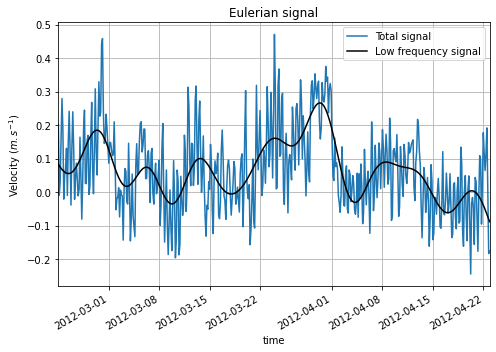

In [29]:
fig,ax = plt.subplots(figsize=(7,5))
dsi.SSU_rot.plot(ax=ax,label='Total signal')
dsi.SSU_rot_hat_low.plot(ax=ax,c='k',label='Low frequency signal')
ax.grid();ax.set_xlim(dsi.time[0],dsi.time[-1])
ax.set_title('Eulerian signal');ax.set_ylabel(r'Velocity ($m.s^{-1}$)')
ax.legend()
fig.tight_layout()
fig.savefig('/Users/zcaspar/Documents/Figures_manuscript/raw_low_1pt.pdf')

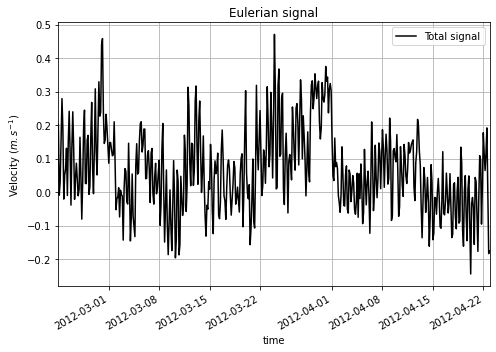

In [31]:
fig,ax = plt.subplots(figsize=(7,5))
dsi.SSU_rot.plot(ax=ax,c='k',label='Total signal')
#dsi.SSU_rot_hat.real.plot(ax=ax,c='g',label='Semidiurnal tidal signal : filtered')
#np.abs(dsi.SSU_rot_demodulated).plot(ax=ax,c='r',label='Semidiurnal tidal signal : demodulated')
ax.grid();ax.set_xlim(dsi.time[0],dsi.time[-1])
ax.set_title('Eulerian signal');ax.set_ylabel(r'Velocity ($m.s^{-1}$)')
ax.legend()
fig.tight_layout()
fig.savefig('/Users/zcaspar/Documents/Figures_manuscript/raw_1pt.pdf')

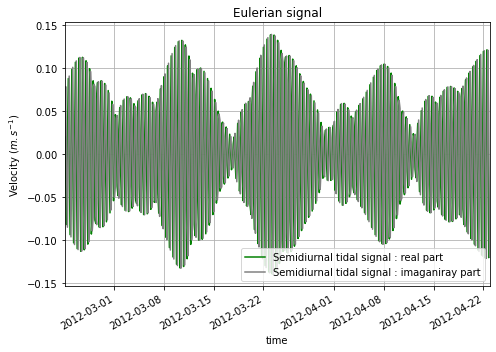

In [40]:
fig,ax = plt.subplots(figsize=(7,5))
#dsi.SSU_rot.plot(ax=ax,c='k',label='Total signal')
dsi.SSU_rot_hat.real.plot(ax=ax,c='g',label='Semidiurnal tidal signal : real part')
dsi.SSU_rot_hat.imag.plot(ax=ax,c='grey',label='Semidiurnal tidal signal : imaganiray part')
#np.abs(dsi.SSU_rot_demodulated).plot(ax=ax,c='r',label='Semidiurnal tidal signal : demodulated')
ax.grid();ax.set_xlim(dsi.time[0],dsi.time[-1])
ax.set_title('Eulerian signal');ax.set_ylabel(r'Velocity ($m.s^{-1}$)')
ax.legend()
fig.tight_layout()
fig.savefig('/Users/zcaspar/Documents/Figures_manuscript/hf_1pt.pdf')

In [51]:
phase = dsi.apply(lambda x : np.angle(x))

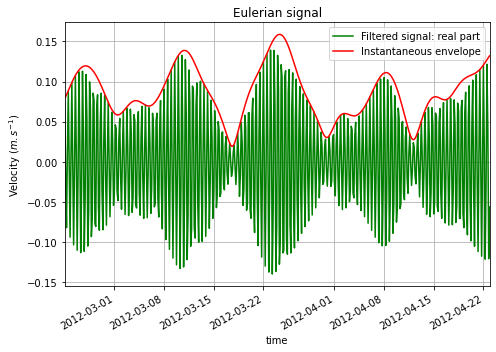

In [54]:
fig,ax = plt.subplots(figsize=(7,5))
dsi.SSU_rot_hat.real.plot(ax=ax,c='g',label='Filtered signal: real part')
#phase.SSU_rot_demodulated.plot(ax=ax,c='g',label='Instantaneous phase')
#dsi.SSU_rot_hat.imag.plot(ax=ax,c='grey',label='Semidiurnal tidal signal : imaganiray part')
np.abs(dsi.SSU_rot_demodulated).plot(ax=ax,c='r',label='Instantaneous envelope')
ax.grid();ax.set_xlim(dsi.time[0],dsi.time[-1])
ax.set_title('Eulerian signal');ax.set_ylabel(r'Velocity ($m.s^{-1}$)')
ax.legend()
fig.tight_layout()
fig.savefig('/Users/zcaspar/Documents/Figures_manuscript/hf_demod_1pt.pdf')